In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential,Model
from keras.layers import concatenate,Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from tqdm import tqdm
import tensorflow as tf
import pandas as pd
import numpy as np
import librosa
import librosa.display
import pylab
import cv2
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
import itertools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping,Callback
from tensorflow.keras.layers import ConvLSTM1D
from keras import Sequential,Model
from keras.layers import concatenate,Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add, BatchNormalization, Reshape
from keras.utils import to_categorical
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score
from imblearn.over_sampling import ADASYN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import os
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential,Model
from keras.layers import concatenate,Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from sklearn.metrics import roc_curve, confusion_matrix
from keras.utils import to_categorical
from keras.optimizers import SGD

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Window Functions Tryout

In [ ]:
import librosa
import numpy as np
import pandas as pd

def generate_audi(path, columns, label, window_type):
    y, sr = librosa.load(path)

    # Rectangular window
    if window_type == 'rect':
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, window='boxcar').T, axis=0)

    # Hamming window
    elif window_type == 'hamming':
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, window='hamming').T, axis=0)

    # Hann window
    elif window_type == 'hann':
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, window='hann').T, axis=0)

    # Blackman window
    elif window_type == 'blackman':
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, window='blackman').T, axis=0)

    # Gaussian window (std=0.25)
    elif window_type == 'gaussian':
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, window=np.gaussian, win_length=1024, std=0.25).T, axis=0)

    # Kaiser window (beta=14)
    elif window_type == 'kaiser':
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, window=np.kaiser, win_length=1024, beta=14).T, axis=0)

    # Kaiser window (beta=20)
    elif window_type == 'kaiser2':
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, window=np.kaiser, win_length=1024, beta=14).T, axis=0)

    else:
        raise ValueError("Invalid window type specified.")

    mfcc_df = pd.DataFrame([mfcc], columns=columns)
    mfcc_df['label'] = label

    return mfcc_df


In [ ]:
def generate_audio_df_window(path, columns, label):
    mfcc_df = pd.DataFrame(columns = columns)

    for wave in tqdm(os.listdir(path)):
      new_path = path + '/' + wave
      try:
        y, sr = librosa.load(path)

        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, window='hann').T, axis=0)

        mfcc_df = pd.DataFrame([mfcc], columns=columns)
        mfcc_df['label'] = label

        return mfcc_df
      except:
        raise
    return mfcc_df



columns = ['mfcc']*40

path = '/content/drive/MyDrive/Projects/Major Project/TORGO'

save_path = "/content/drive/MyDrive/Projects/Major Project/Data/WindowTrial/hann/"

print(len(os.listdir(path)))
for folder in os.listdir(path):
  if folder=='MC':

    for speaker in os.listdir(path + "/" + folder):
      new_path = path + "/" + folder + "/" + speaker
      for session in os.listdir(new_path):
        if session[0]=='S':
          session_path = new_path + '/' + session

          for file in os.listdir(session_path):
            if file == 'wav_headMic':
              path2 = session_path + "/" + file
              audio_df = generate_audio_df_window(path2,columns,0)
              name = "male" + str(speaker[-1]) +"_"+ str(session) + "_0_" + "headMic"
              audio_df.to_csv(save_path + name + '.csv', index=False)


for folder in os.listdir(path):
  if folder=='FC':

    for speaker in os.listdir(path + "/" + folder):
      new_path = path + "/" + folder + "/" + speaker
      for session in os.listdir(new_path):
        if session[0]=='S':
          session_path = new_path + '/' + session

          for file in os.listdir(session_path):
            if file == 'wav_headMic':
              path2 = session_path + "/" + file
              audio_df = generate_audio_df_window(path2,columns,0)
              name = "female" + str(speaker[-1]) +"_"+ str(session) + "_0_" + "headMic"
              audio_df.to_csv(save_path + name + '.csv', index=False)


for folder in os.listdir(path):
  if folder=='M':

    for speaker in os.listdir(path + "/" + folder):
      new_path = path + "/" + folder + "/" + speaker
      for session in os.listdir(new_path):
        if session[0]=='S':
          session_path = new_path + '/' + session

          for file in os.listdir(session_path):
            if file == 'wav_headMic':
              path2 = session_path + "/" + file
              audio_df = generate_audio_df_window(path2,columns,1)
              name = "male" + str(speaker[-1]) +"_"+ str(session) + "_1_" + "headMic"
              audio_df.to_csv(save_path+ name + '.csv', index=False)


for folder in os.listdir(path):
  if folder=='F':

    for speaker in os.listdir(path + "/" + folder):
      new_path = path + "/" + folder + "/" + speaker
      for session in os.listdir(new_path):
        if session[0]=='S':
          session_path = new_path + '/' + session

          for file in os.listdir(session_path):
            if file == 'wav_headMic':
              path2 = session_path + "/" + file
              audio_df = generate_audio_df_window(path2,columns,1)
              name = "female" + str(speaker[-1]) +"_"+ str(session) + "_1_" + "headMic"
              audio_df.to_csv(save_path + name + '.csv', index=False)


8


  0%|          | 0/388 [00:00<?, ?it/s]


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Projects/Major Project/TORGO/MC/MC02/Session1/wav_headMic'

In [ ]:
def update_label(df, file_name):

  if file_name[-14] == '0':
    df['new_label'] = 0
  else:
    if file_name[0] == 'f':
      if file_name[6] == '1':
        df['new_label'] = 2
      else :
        df['new_label'] = 1
    else:
      if file_name[4]=='3':
        df['new_label'] = 1
      elif file_name[4]=='5':
        df['new_label'] = 2
      else :
        df['new_label'] = 3

  return df

from sklearn.preprocessing import StandardScaler
path = "/content/drive/MyDrive/Projects/Major Project/Data/WindowTrial/hann/"

features = pd.DataFrame()
label = pd.DataFrame()

for file_name in tqdm(os.listdir(path)):

    file_path = path + file_name

    x = pd.read_csv(file_path)
    x['new_label'] = -1
    x = update_label(x,file_name)
    y = x['new_label']
    x = x.drop('new_label',axis=1)

    if features.empty:
      features = x
      label = y
    else:
      features = pd.concat([features,x],axis=0)
      label = pd.concat([label,y],axis=0)



100%|██████████| 26/26 [00:00<00:00, 36.33it/s]


In [ ]:
print(features.shape, label.shape)

# X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.3,random_state = 0)
# len(X_train), len(X_test)

(0, 40) (0,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=201,criterion = "entropy")
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluate_model(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, "Random Forest")

# Feature Extraction

In [ ]:
def extract_features(y,sr):
  try:
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc=40).T, axis = 0)
    mel = np.mean(librosa.feature.melspectrogram(y = y, sr = sr).T, axis = 0)
    stft = np.abs(librosa.stft(y))
    chroma = np.mean(librosa.feature.chroma_stft(S = stft, y = y, sr = sr).T, axis = 0)
    contrast = np.mean(librosa.feature.spectral_contrast(S = stft, y = y, sr = sr).T, axis = 0)
    tonnetz =  np.mean(librosa.feature.tonnetz(y = librosa.effects.harmonic(y), sr = sr).T, axis = 0)
    return mfcc,chroma,mel,contrast,tonnetz # shape: (40,), (12,), (128,), (7,), (6,)

  except:
    return None,None,None,None,None

In [ ]:
def generate_audio_df(path,columns,label):
  audio_df = pd.DataFrame(columns = columns)

  for wave in tqdm(os.listdir(path)):
    new_path = path + '/' + wave
    try:
      audio,sr = librosa.load(new_path)
      mfcc,chroma,mel,contrast,tonnetz = extract_features(audio,sr)

      features = np.hstack([mfcc,chroma,mel,contrast,tonnetz,label])
      fill = np.empty((0,194))
      features = np.vstack([fill,features])
      row_df = pd.DataFrame(features, columns = columns)
      audio_df = pd.concat([audio_df, row_df], ignore_index = True)
    except:
      continue

  return audio_df

In [ ]:
columns = ['mfcc']*40 + ['chroma']*12 + ['mel']*128 + ['contrast']*7 + ['tonnetz']*6 + ['label']

In [ ]:
# path = '/content/drive/MyDrive/Projects/Major Project/TORGO'

# save_path = "/content/drive/MyDrive/Projects/Major Project/Data/Feature_CSVS/"


# for folder in os.listdir(path):
#   if folder=='MC':

#     for speaker in os.listdir(path + "/" + folder):
#       new_path = path + "/" + folder + "/" + speaker
#       for session in os.listdir(new_path):
#         if session[0]=='S':
#           session_path = new_path + '/' + session

#           for file in os.listdir(session_path):
#             if file == 'wav_headMic':
#               path2 = session_path + "/" + file
#               audio_df = generate_audio_df(path2,columns,0)
#               name = "male" + str(speaker[-1]) +"_"+ str(session) + "_0_" + "headMic"
#               audio_df.to_csv(save_path + name + '.csv', index=False)


# for folder in os.listdir(path):
#   if folder=='FC':

#     for speaker in os.listdir(path + "/" + folder):
#       new_path = path + "/" + folder + "/" + speaker
#       for session in os.listdir(new_path):
#         if session[0]=='S':
#           session_path = new_path + '/' + session

#           for file in os.listdir(session_path):
#             if file == 'wav_headMic':
#               path2 = session_path + "/" + file
#               audio_df = generate_audio_df(path2,columns,0)
#               name = "female" + str(speaker[-1]) +"_"+ str(session) + "_0_" + "headMic"
#               audio_df.to_csv(save_path + name + '.csv', index=False)


# for folder in os.listdir(path):
#   if folder=='M':

#     for speaker in os.listdir(path + "/" + folder):
#       new_path = path + "/" + folder + "/" + speaker
#       for session in os.listdir(new_path):
#         if session[0]=='S':
#           session_path = new_path + '/' + session

#           for file in os.listdir(session_path):
#             if file == 'wav_headMic':
#               path2 = session_path + "/" + file
#               audio_df = generate_audio_df(path2,columns,1)
#               name = "male" + str(speaker[-1]) +"_"+ str(session) + "_1_" + "headMic"
#               audio_df.to_csv(save_path+ name + '.csv', index=False)


# for folder in os.listdir(path):
#   if folder=='F':

#     for speaker in os.listdir(path + "/" + folder):
#       new_path = path + "/" + folder + "/" + speaker
#       for session in os.listdir(new_path):
#         if session[0]=='S':
#           session_path = new_path + '/' + session

#           for file in os.listdir(session_path):
#             if file == 'wav_headMic':
#               path2 = session_path + "/" + file
#               audio_df = generate_audio_df(path2,columns,1)
#               name = "female" + str(speaker[-1]) +"_"+ str(session) + "_1_" + "headMic"
#               audio_df.to_csv(save_path + name + '.csv', index=False)


In [ ]:
# no  - 0
# very low - 1 -> F03, F04, M03
# low - 2 -> F01,M05
# medium - 3 -> M02, M04, M01


def update_label(df, file_name):

  if file_name[-14] == '0':
    df['new_label'] = 0
  else:
    if file_name[0] == 'f':
      if file_name[6] == '1':
        df['new_label'] = 2
      else :
        df['new_label'] = 1
    else:
      if file_name[4]=='3':
        df['new_label'] = 1
      elif file_name[4]=='5':
        df['new_label'] = 2
      else :
        df['new_label'] = 3

  return df

In [ ]:
from sklearn.preprocessing import StandardScaler
path = "/content/drive/MyDrive/Projects/Major Project/Data/Feature_CSVS/"

features = pd.DataFrame()
label = pd.DataFrame()

affected_males = 0
affected_females = 0
males = 0
females = 0

very_low = 0
low = 0
med = 0

for file_name in tqdm(os.listdir(path)):

    file_path = path + file_name

    x = pd.read_csv(file_path)
    x['new_label'] = -1
    x = update_label(x,file_name)
    y = x['new_label']
    x = x.drop('new_label',axis=1)

    if features.empty:
      features = x
      label = y
    else:
      features = pd.concat([features,x],axis=0)
      label = pd.concat([label,y],axis=0)

features.shape, label.shape

100%|██████████| 26/26 [00:13<00:00,  1.98it/s]


((8216, 194), (8216,))

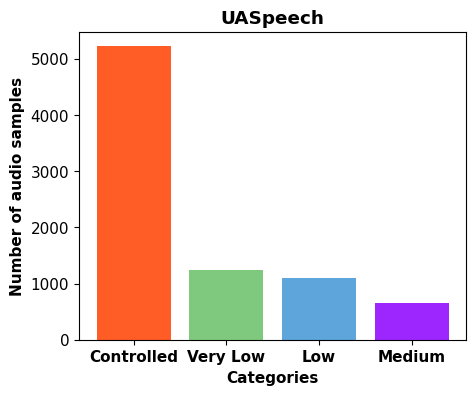

In [ ]:
import matplotlib.pyplot as plt

# Increase font size and set font weight to 'bold'
plt.rcParams.update({'font.size': 11})

class_labels = ['Controlled', 'Very Low', 'Low', 'Medium']
values = list(label.value_counts())
colors = ['#ff5c26','#7fc97f', '#5da5db', '#9d26ff']

plt.figure(figsize=(5, 4))  # Adjusted figure size

# Use colors parameter to set colors for each bar
plt.bar(range(len(values)), values, color=colors)

plt.xlabel('Categories', fontweight='bold')  # Set font weight for xlabel
plt.ylabel('Number of audio samples', fontweight='bold')  # Set font weight for ylabel
plt.xticks(range(len(values)), class_labels, fontweight='bold')  # Set font weight for xticks

plt.title('TORGO', fontweight='bold')  # Set font weight for title
plt.show()


## Generate audioforms

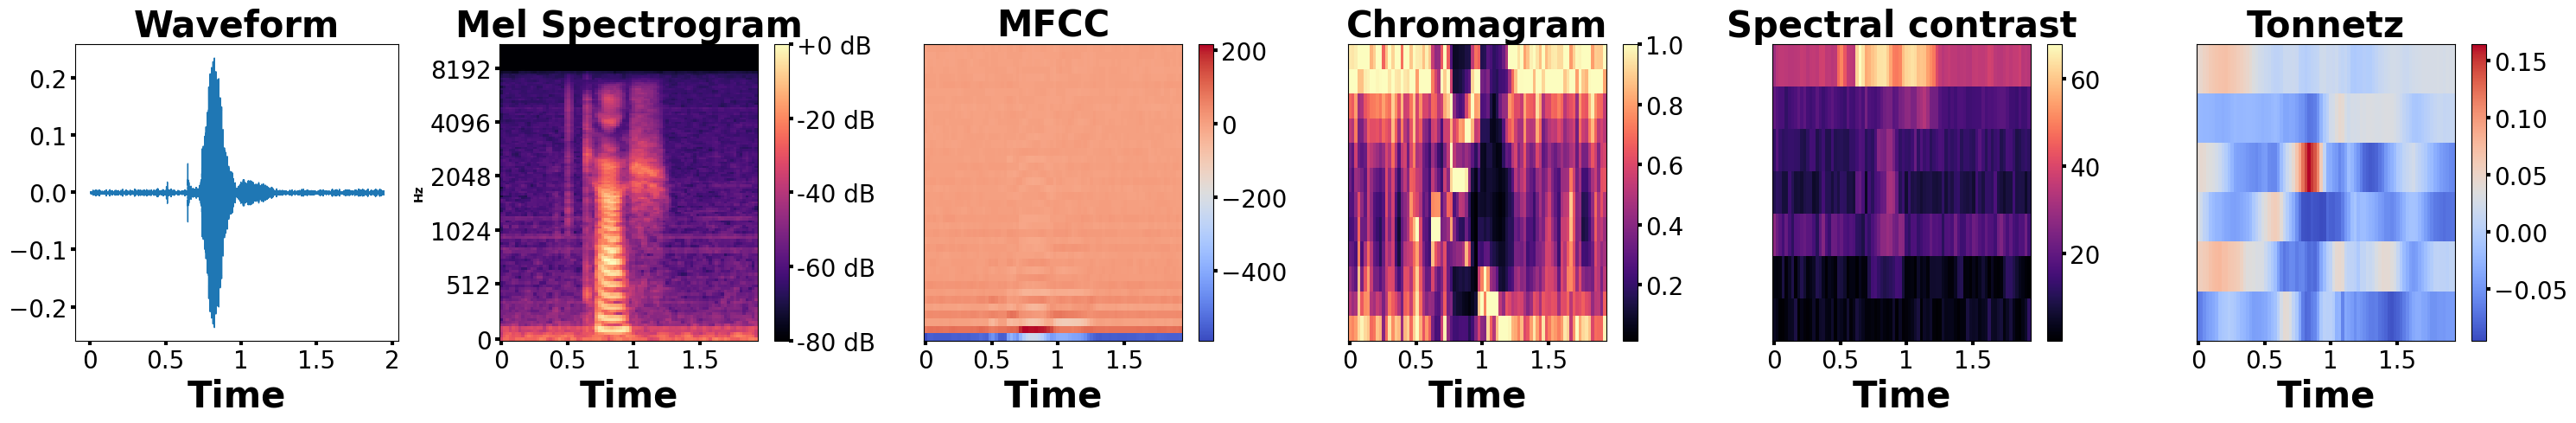

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_path = "/content/drive/MyDrive/Projects/Major Project/TORGO/MC/MC01/Session2/wav_headMic/0304.wav"
# audio_path = "/content/drive/MyDrive/Projects/Major Project/TORGO/M/M01/Session1/wav_headMic/0005.wav"
y, sr = librosa.load(audio_path)

# Calculate MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

# Calculate Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)

# Calculate Chroma
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Calculate Contrast
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

# Calculate Tonnetz
tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

# Plot
plt.figure(figsize=(30, 5))

# Waveform plot
plt.subplot(1, 6, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform', fontsize=30, weight="bold")
plt.xlabel('Time', fontsize=30, weight="bold")
plt.gca().xaxis.label.set_fontweight('bold')
plt.gca().yaxis.label.set_fontweight('bold')

# Mel Spectrogram plot
plt.subplot(1, 6, 2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram', fontsize=30, weight="bold")
plt.xlabel('Time', fontsize=30, weight="bold")
plt.gca().xaxis.label.set_fontweight('bold')
plt.gca().yaxis.label.set_fontweight('bold')

# MFCC plot
plt.subplot(1, 6, 3)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC', fontsize=30, weight="bold")
plt.xlabel('Time', fontsize=30, weight="bold")
plt.gca().xaxis.label.set_fontweight('bold')
plt.gca().yaxis.label.set_fontweight('bold')

# Chroma plot
plt.subplot(1, 6, 4)
librosa.display.specshow(chroma, sr=sr, x_axis='time')
plt.colorbar()
plt.title('Chromagram', fontsize=30, weight="bold")
plt.xlabel('Time', fontsize=30, weight="bold")
plt.gca().xaxis.label.set_fontweight('bold')
plt.gca().yaxis.label.set_fontweight('bold')

# Contrast plot
plt.subplot(1, 6, 5)
librosa.display.specshow(contrast, sr=sr, x_axis='time')
plt.colorbar()
plt.title('Spectral contrast', fontsize=30, weight="bold")
plt.xlabel('Time', fontsize=30, weight="bold")
plt.gca().xaxis.label.set_fontweight('bold')
plt.gca().yaxis.label.set_fontweight('bold')

# Tonnetz plot
plt.subplot(1, 6, 6)
librosa.display.specshow(tonnetz, sr=sr, x_axis='time')
plt.colorbar()
plt.title('Tonnetz', fontsize=30, weight="bold")
plt.xlabel('Time', fontsize=30, weight="bold")
plt.gca().xaxis.label.set_fontweight('bold')
plt.gca().yaxis.label.set_fontweight('bold')


# Increase x-tick and y-tick sizes
for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', which='major', labelsize=20, width=3)
    ax.tick_params(axis='both', which='minor', labelsize=20, width=3)



plt.tight_layout()
plt.show()


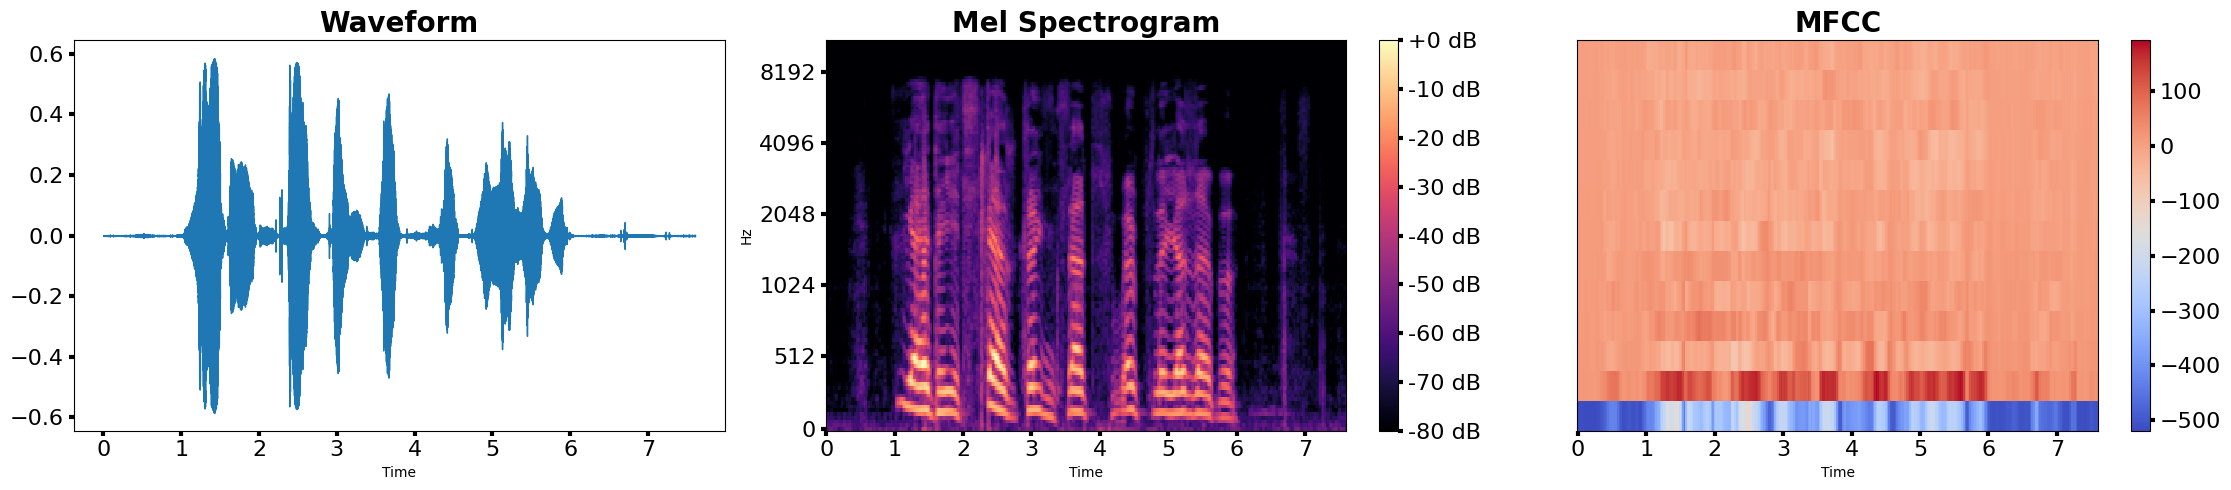

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_path = "/content/drive/MyDrive/Projects/Major Project/TORGO/M/M02/Session1/wav_headMic/0066.wav"
y, sr = librosa.load(audio_path)

# Calculate MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Calculate Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)

# Calculate STFT
D = librosa.stft(y)

# Calculate zero-crossings
# zero_crossings = librosa.zero_crossings(y, pad=False)

zero_crossings = librosa.zero_crossings(y)
# print("Sum of zero crossing ", zero_crossings.sum())
zcrs = librosa.feature.zero_crossing_rate(y)
# plt.plot(zcrs[0])
# plt.show()


# Plot
plt.figure(figsize=(30, 5))

# Waveform plot
plt.subplot(1, 4, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform', fontsize=20, weight="bold")

# Mel Spectrogram plot
plt.subplot(1, 4, 2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram', fontsize=20, weight="bold")

# MFCC plot
plt.subplot(1, 4, 3)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC', fontsize=20, weight="bold")


# Increase x-tick and y-tick sizes
for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', which='major', labelsize=16, width=3)
    ax.tick_params(axis='both', which='minor', labelsize=16, width=3)


plt.tight_layout()
plt.show()


##Utils

In [ ]:
def plot_confusion_matrix(cm, classes,
                          name,
                          cmap,
                          normalize=False,
                          title='Confusion matrix'):

    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, weight = 'bold')
    plt.yticks(tick_marks, classes, weight = 'bold')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", weight = 'bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Labels', fontweight='bold',fontsize = 12)
    plt.xlabel('Predicted Labels', fontweight='bold', fontsize = 12)
    fig = plt
    plt.show()


def plots_curves_and_cm(cm, classes, name, cmap, history, normalize=False, title='Confusion matrix'):

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Plot confusion matrix
    axes[0].imshow(cm, interpolation='nearest', cmap=cmap)
    axes[0].set_title(name + "Confusion Matrix")
    tick_marks = np.arange(len(classes))
    axes[0].set_xticks(tick_marks)
    axes[0].set_xticklabels(classes, rotation=45, weight='bold')
    axes[0].set_yticks(tick_marks)
    axes[0].set_yticklabels(classes, weight='bold')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        axes[0].text(j, i, cm[i, j],
                    horizontalalignment="center", weight='bold',
                    color="white" if cm[i, j] > thresh else "black")

    axes[0].set_ylabel('True Labels', fontweight='bold', fontsize=12)
    axes[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize=12)

    # Plot accuracy
    axes[1].plot(history.history['accuracy'], label='Train Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title(name + 'Model Accuracy')
    axes[1].set_xlabel('Epoch', fontweight='bold', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontweight='bold', fontsize=12)
    axes[1].legend()

    # Plot loss
    axes[2].plot(history.history['loss'], label='Train Loss')
    axes[2].plot(history.history['val_loss'], label='Validation Loss')
    axes[2].set_title(name+'Model Loss')
    axes[2].set_xlabel('Epoch', fontweight='bold', fontsize=12)
    axes[2].set_ylabel('Loss', fontweight='bold', fontsize=12)
    axes[2].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def create_plots(cm_plot_labels, name, y_true,y_pred, history, map_col):
    y_predict_classes, y_true_classes = y_pred,y_true

    confusion_matrix_computed = confusion_matrix(y_true_classes, y_predict_classes)

    if history:
        plots_curves_and_cm(confusion_matrix_computed, cm_plot_labels, name, map_col, history)
    else:
        plot_confusion_matrix(confusion_matrix_computed, cm_plot_labels, name, map_col)

def evaluate_model(x_train, y_train, y_train_pred, x_test, y_test, y_test_pred, name, history=None):

    # Train accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Train Accuracy: {train_accuracy:.4f}")

    # Test metrics
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"\nTest Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")

    classes = ["Controlled", "Very Low", "Low", "Medium"]

    # Classification Report Plot
    report = classification_report(y_test,y_test_pred, digits=3)
    print("\nClassification Report:")
    print(report)

    print()

    create_plots(classes, name, y_test[:len(y_test_pred)], y_test_pred, history, map_col = 'Oranges')

In [ ]:

def evaluate_model_nn(x_train, y_train, x_val, y_val, x_test, y_test, name, model, history=None):

    # Train accuracy
    train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Train Loss: {train_loss:.4f}")


    # Validation accuracy and loss
    val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")

    # Test accuracy and loss
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    y_test_pred = model.predict(x_test)

    y_test_pred = np.argmax(y_test_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)

    # test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    print("\nTest Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Loss: {test_loss:.4f}")


    classes = ["Controlled", "Very Low", "Low", "Medium"]

    report = classification_report(y_test, y_test_pred, digits=3)
    print(report)

    print()

    create_plots(classes, name, y_test, y_test_pred, history, map_col='Oranges')


    # print()

    # create_plots(classes, name, y_test[:len(y_test_pred)], y_test_pred, history, map_col = 'Oranges')

# Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.3,random_state = 0)
len(X_train), len(X_test)

(5751, 2465)

## KNN


Train Accuracy: 0.9539

Test Metrics:
Precision: 0.9157
Recall: 0.9160
F1 Score: 0.9135
Accuracy: 0.9160

Classification Report:
              precision    recall  f1-score   support

           0      0.918     0.986     0.951      1556
           1      0.889     0.789     0.836       394
           2      0.952     0.872     0.910       180
           3      0.918     0.764     0.834       335

    accuracy                          0.916      2465
   macro avg      0.919     0.853     0.883      2465
weighted avg      0.916     0.916     0.914      2465




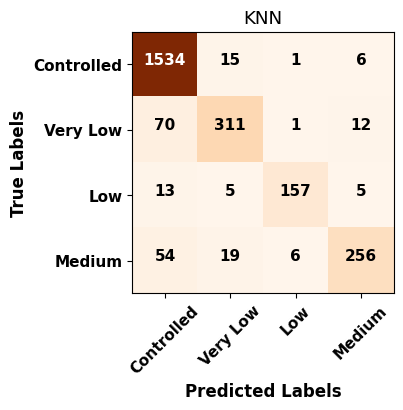

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluate_model(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, "KNN")

## SVM Implementation


Train Accuracy: 1.0000

Test Metrics:
Precision: 0.9628
Recall: 0.9631
F1 Score: 0.9627
Accuracy: 0.9631

Classification Report:
              precision    recall  f1-score   support

           0      0.973     0.993     0.983      1556
           1      0.939     0.937     0.938       394
           2      0.959     0.911     0.934       180
           3      0.946     0.884     0.914       335

    accuracy                          0.963      2465
   macro avg      0.954     0.931     0.942      2465
weighted avg      0.963     0.963     0.963      2465




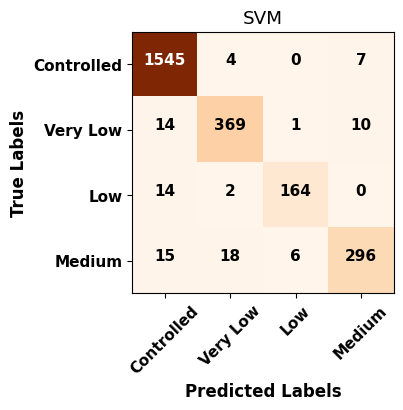

In [ ]:
from sklearn.svm import SVC
model = SVC(C=0.1, gamma=0.001, kernel='poly')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluate_model(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, "SVM")

##Tune Parameters


In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
# grid.fit(X_train,y_train)
# print(grid.best_estimator_)
# grid_predictions = grid.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score

# print(accuracy_score(y_test, grid_predictions))

0.9626774847870182


## Decision Tree

Train Accuracy: 1.0000

Test Metrics:
Precision: 0.9664
Recall: 0.9663
F1 Score: 0.9663
Accuracy: 0.9663

Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1556
           1      0.931     0.931     0.931       394
           2      0.868     0.878     0.873       180
           3      0.904     0.899     0.901       335

    accuracy                          0.966      2465
   macro avg      0.926     0.927     0.926      2465
weighted avg      0.966     0.966     0.966      2465




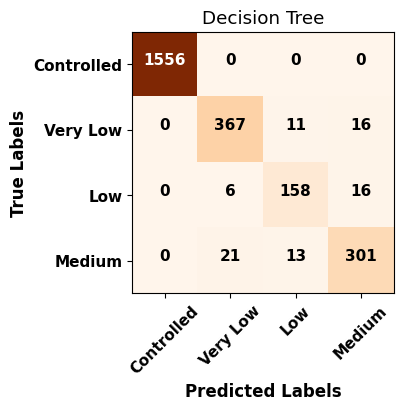

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluate_model(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, "Decision Tree")

## Xg Boost

Train Accuracy: 0.9977

Test Metrics:
Precision: 0.9912
Recall: 0.9911
F1 Score: 0.9911
Accuracy: 0.9911

Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1556
           1      0.961     0.992     0.976       394
           2      0.994     0.967     0.980       180
           3      0.985     0.961     0.973       335

    accuracy                          0.991      2465
   macro avg      0.985     0.980     0.982      2465
weighted avg      0.991     0.991     0.991      2465




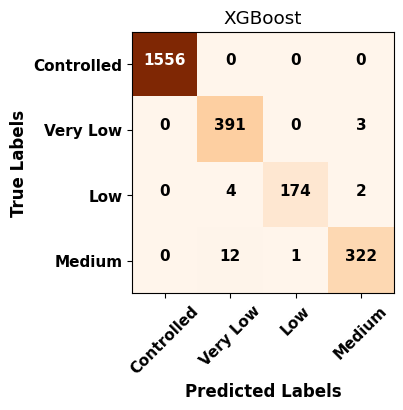

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
data_dmatrix

params = {
    'objective':'binary:logistic',
    'max_depth':4,
    'alpha':10,
    'learning_rate':1.0,
    'n_estimators':100
}

model = XGBClassifier(**params)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluate_model(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, "XGBoost")

## Gradient Boosting

Train Accuracy: 1.0000

Test Metrics:
Precision: 0.9928
Recall: 0.9927
F1 Score: 0.9927
Accuracy: 0.9927

Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1556
           1      0.970     0.992     0.981       394
           2      0.989     0.978     0.983       180
           3      0.988     0.967     0.977       335

    accuracy                          0.993      2465
   macro avg      0.987     0.984     0.985      2465
weighted avg      0.993     0.993     0.993      2465




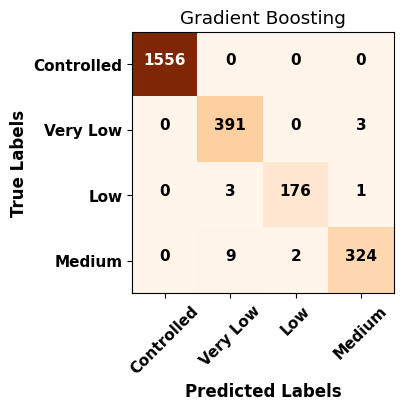

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluate_model(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, "Gradient Boosting")


## Random Forest

Train Accuracy: 1.0000

Test Metrics:
Precision: 0.9920
Recall: 0.9919
F1 Score: 0.9919
Accuracy: 0.9919

Classification Report:
              precision    recall  f1-score   support

           0      0.999     1.000     0.999      1556
           1      0.965     0.992     0.979       394
           2      0.989     0.972     0.980       180
           3      0.994     0.964     0.979       335

    accuracy                          0.992      2465
   macro avg      0.987     0.982     0.984      2465
weighted avg      0.992     0.992     0.992      2465




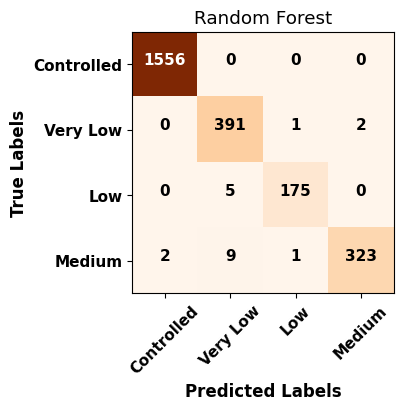

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=201,criterion = "entropy")
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluate_model(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, "Random Forest")

## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=201)

In [ ]:
model.score(X_test,y_test)

0.9918864097363083

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.9918864097363083


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       0.97      0.99      0.98       394
           2       0.99      0.97      0.98       180
           3       0.99      0.96      0.98       335

    accuracy                           0.99      2465
   macro avg       0.99      0.98      0.98      2465
weighted avg       0.99      0.99      0.99      2465



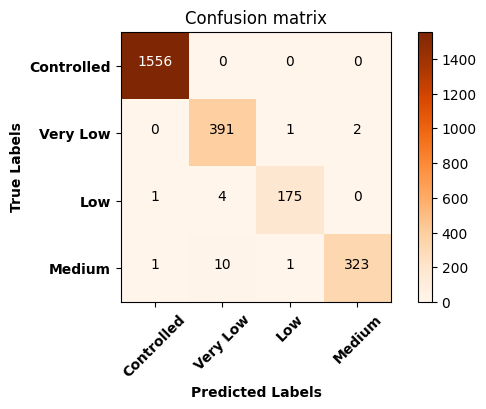

In [ ]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

classes = ["Controlled", "Very Low", "Low", "Medium"]
name = "Confusion matrix"

# passing actual and predicted values
create_confusion_matrix(classes, name = name, y_true = y_test[:len(y_pred)], y_pred = y_pred, map_col = 'Oranges')

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
features_pca = pca.fit_transform(features)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(features_pca, label, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.9249492900608519

In [ ]:
from sklearn.svm import SVC
model = SVC(C=0.1, gamma=0.001, kernel='poly')
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9456389452332657

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=201,criterion = "entropy")
model.fit(X_train_pca, y_train)
model.score(X_test_pca,y_test)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test_pca)
classes = ["Controlled", "Very Low", "Low", "Medium"]
name = "Confusion matrix"
# passing actual and predicted values
create_confusion_matrix(classes, name = name, y_true = y_test[:len(y_pred)], y_pred = y_pred, map_col = 'Oranges')

# Deep learning based models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2,random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 0)

y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

y_train_real = np.argmax(y_train, axis=1)
y_test_real = np.argmax(y_test, axis=1)

### ANN

In [ ]:
def build_model_ann():
    # Input layer with shape (batch_size, 193)
    inp1   = Input(shape=(None, 194))  # None for batch size dimension
    lay1   = Dense(units=512, activation='relu')(inp1)
    # lay2   = Dropout(0.4)(lay1)
    lay3   = Dense(units=256, activation='relu')(lay1)
    lay4   = Dropout(0.2)(lay3)
    hidden1 = Dense(128, activation='relu')(lay3)
    # hidden2 = Dense(64, activation='relu')(hidden1)
    output  = Dense(4, activation='softmax')(hidden1)
    model   = Model(inputs=inp1, outputs=output)

    return model

In [ ]:
model = build_model_ann()

optimizer = SGD(learning_rate=0.0003, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
83/83 [==============================] - 8s 46ms/step - loss: 2.3804 - accuracy: 0.7455 - val_loss: 0.5828 - val_accuracy: 0.7665
Epoch 2/50
83/83 [==============================] - 2s 27ms/step - loss: 0.5359 - accuracy: 0.8714 - val_loss: 0.3713 - val_accuracy: 0.8996
Epoch 3/50
83/83 [==============================] - 2s 22ms/step - loss: 0.2618 - accuracy: 0.9330 - val_loss: 0.3402 - val_accuracy: 0.9072
Epoch 4/50
83/83 [==============================] - 1s 18ms/step - loss: 0.2031 - accuracy: 0.9553 - val_loss: 0.3429 - val_accuracy: 0.8798
Epoch 5/50
83/83 [==============================] - 1s 15ms/step - loss: 0.1928 - accuracy: 0.9616 - val_loss: 0.1537 - val_accuracy: 0.9551
Epoch 6/50
83/83 [==============================] - 1s 15ms/step - loss: 0.1022 - accuracy: 0.9741 - val_loss: 0.2315 - val_accuracy: 0.9361
Epoch 7/50
83/83 [==============================] - 1s 14ms/step - loss: 0.1028 - accuracy: 0.9751 - val_loss: 0.2797 - val_accuracy: 0.9354
Epoch 8/50
83

Train Accuracy: 0.9992
Train Loss: 0.0020
Validation Accuracy: 0.9863
Validation Loss: 0.1303
52/52 [==============================] - 0s 2ms/step

Test Metrics:
Precision: 0.9824
Recall: 0.9824
F1 Score: 0.9823
Accuracy: 0.9824
Loss: 0.0837
              precision    recall  f1-score   support

           0      0.989     0.999     0.994      1044
           1      0.985     0.949     0.966       272
           2      0.983     0.958     0.970       120
           3      0.948     0.957     0.952       208

    accuracy                          0.982      1644
   macro avg      0.976     0.966     0.971      1644
weighted avg      0.982     0.982     0.982      1644




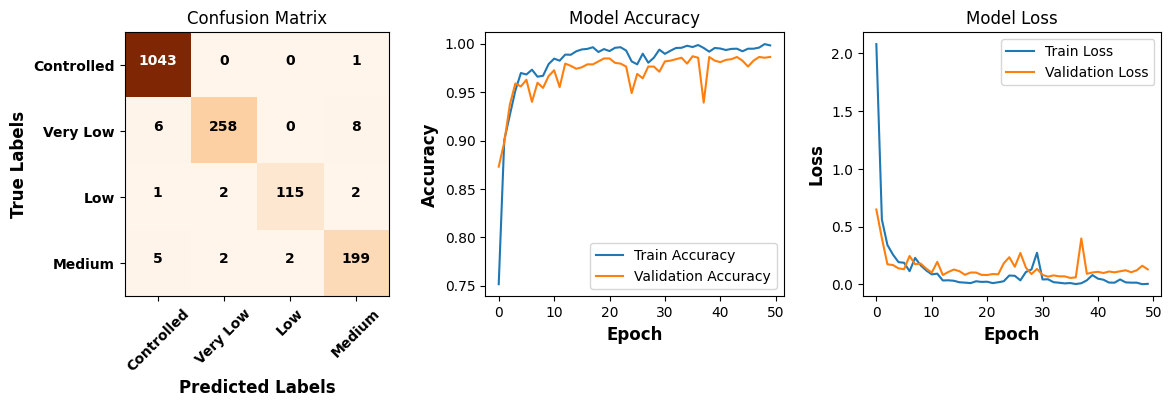

In [ ]:
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# y_train_pred = np.argmax(y_train_pred, axis=1)
# y_test_pred = np.argmax(y_test_pred, axis=1)

# evaluate_model_nn(X_train, y_train, y_train_pred, X_test, y_test_real, y_test_pred, "",model, history)
evaluate_model_nn(X_train, y_train, X_val, y_val, X_test, y_test, "", model, history)


### CNN

In [ ]:
def build_model_cnn():

    inp   = Input(shape=194)
    lay1   = Dense(units=512,activation='relu',kernel_initializer='GlorotUniform')(inp)
    lay2   = Dropout(0.4)(lay1)
    lay61  = Reshape((64,8,1))(lay2)
    lay62  = Conv2D(32, (3, 3), strides=(2, 2))(lay61)
    lay63  = AveragePooling2D((2, 2), strides=(2,2))(lay62)
    lay64  = BatchNormalization()(lay63)
    lay65  = Activation('relu')(lay64)

    lay66  = Conv2D(64, (3, 3), padding="same") (lay65)
    # lay67  = AveragePooling2D((2, 2), strides=(2,2)) (lay66)
    lay68  = BatchNormalization()(lay66)
    lay69  = Activation('relu')(lay68)

    lay611  = Conv2D(64, (3, 3), padding="same") (lay69)
    # lay612 = AveragePooling2D((2, 2), strides=(2,2)) (lay611)
    lay613 = BatchNormalization()(lay611)
    lay614 = Activation('relu')(lay613)

    lay615 = Flatten()(lay614)
    lay616 = Dense(units=256,activation='relu',kernel_initializer='GlorotUniform')(lay615)
    lay617 = Dropout(rate=0.5)(lay616)
    lay3   = Dense(units=256,activation='relu',kernel_initializer='GlorotUniform')(lay2)
    lay4   = Dropout(0.3)(lay3)
    hidden1 = Dense(64, activation='relu')(lay4)
    # hidden2 = Dense(64, activation='relu')(hidden1)
    output  = Dense(4, activation='softmax')(hidden1)
    model   = Model(inputs=inp, outputs=output)

    return model

In [ ]:
model_cnn = build_model_cnn()

optimizer = SGD(learning_rate=0.0003, momentum=0.9)
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_cnn.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
83/83 [==============================] - 7s 36ms/step - loss: 4.3881 - accuracy: 0.5967 - val_loss: 0.8264 - val_accuracy: 0.7224
Epoch 2/50
83/83 [==============================] - 2s 23ms/step - loss: 1.3456 - accuracy: 0.6694 - val_loss: 0.6210 - val_accuracy: 0.7802
Epoch 3/50
83/83 [==============================] - 1s 15ms/step - loss: 0.9088 - accuracy: 0.7350 - val_loss: 0.5372 - val_accuracy: 0.8213
Epoch 4/50
83/83 [==============================] - 2s 19ms/step - loss: 0.8313 - accuracy: 0.7675 - val_loss: 0.4959 - val_accuracy: 0.8532
Epoch 5/50
83/83 [==============================] - 1s 17ms/step - loss: 0.6261 - accuracy: 0.8090 - val_loss: 0.4270 - val_accuracy: 0.8875
Epoch 6/50
83/83 [==============================] - 2s 19ms/step - loss: 0.6012 - accuracy: 0.8288 - val_loss: 0.3227 - val_accuracy: 0.8981
Epoch 7/50
83/83 [==============================] - 2s 20ms/step - loss: 0.4927 - accuracy: 0.8667 - val_loss: 0.2714 - val_accuracy: 0.9141
Epoch 8/50
83

Train Accuracy: 0.9973
Train Loss: 0.0135
Validation Accuracy: 0.9863
Validation Loss: 0.0523
52/52 [==============================] - 0s 2ms/step

Test Metrics:
Precision: 0.9848
Recall: 0.9848
F1 Score: 0.9847
Accuracy: 0.9848
Loss: 0.0548
              precision    recall  f1-score   support

           0      0.990     0.997     0.994      1044
           1      0.975     0.985     0.980       272
           2      0.982     0.917     0.948       120
           3      0.971     0.962     0.966       208

    accuracy                          0.985      1644
   macro avg      0.980     0.965     0.972      1644
weighted avg      0.985     0.985     0.985      1644




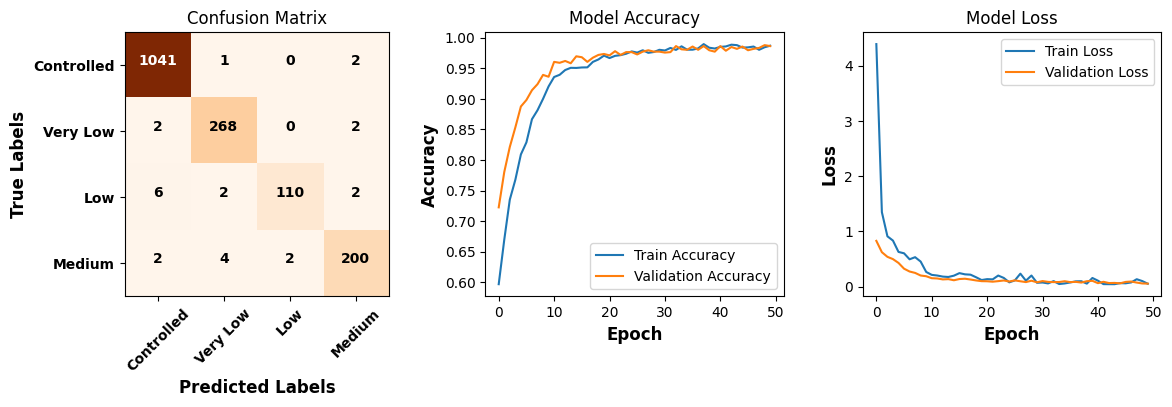

In [ ]:
# lstm 2
evaluate_model_nn(X_train, y_train, X_val, y_val, X_test, y_test, "", model_cnn, history)

Train Accuracy: 0.9971
Train Loss: 0.0088
Validation Accuracy: 0.9833
Validation Loss: 0.0834
52/52 [==============================] - 0s 3ms/step

Test Metrics:
Precision: 0.9824
Recall: 0.9824
F1 Score: 0.9823
Accuracy: 0.9824
Loss: 0.0673
              precision    recall  f1-score   support

           0      0.987     0.997     0.992      1044
           1      0.985     0.960     0.972       272
           2      0.982     0.925     0.953       120
           3      0.957     0.971     0.964       208

    accuracy                          0.982      1644
   macro avg      0.978     0.963     0.970      1644
weighted avg      0.982     0.982     0.982      1644




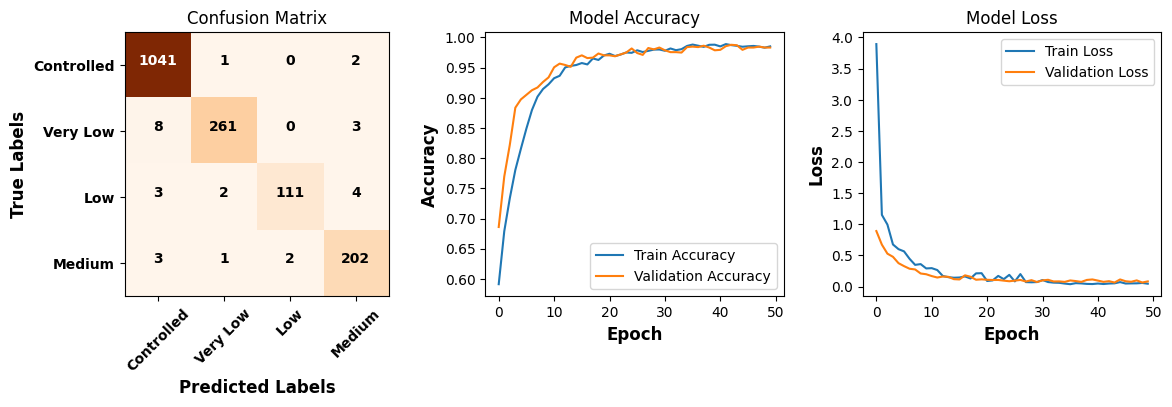

In [ ]:
evaluate_model_nn(X_train, y_train, X_val, y_val, X_test, y_test, "", model_cnn, history)

###LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Reshape, ConvLSTM1D, BatchNormalization, Flatten

def build_model_lstm():
    model = Sequential()

    # First block
    model.add(Dense(units=512, activation='relu', kernel_initializer='GlorotUniform', input_shape=(194,)))
    model.add(Dropout(0.3))

    # Second block
    model.add(Reshape((64, 8, 1)))
    model.add(ConvLSTM1D(filters=40, kernel_size=3, padding='same', return_sequences=True))
    model.add(BatchNormalization())
    model.add(ConvLSTM1D(filters=40, kernel_size=3, padding='same', return_sequences=True))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu', kernel_initializer='GlorotUniform'))
    model.add(Dropout(rate=0.3))

    model.add(Dense(units=256, activation='relu', kernel_initializer='GlorotUniform'))
    model.add(Dropout(0.2))

    # model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(4, activation='softmax'))

    return model


In [ ]:
model = build_model_lstm()

optimizer = SGD(learning_rate=0.0003, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
83/83 [==============================] - 53s 559ms/step - loss: 1.3872 - accuracy: 0.6188 - val_loss: 0.8336 - val_accuracy: 0.6403
Epoch 2/50
83/83 [==============================] - 47s 571ms/step - loss: 0.7144 - accuracy: 0.7194 - val_loss: 1.1185 - val_accuracy: 0.6760
Epoch 3/50
83/83 [==============================] - 47s 572ms/step - loss: 0.6506 - accuracy: 0.7438 - val_loss: 0.7736 - val_accuracy: 0.7262
Epoch 4/50
83/83 [==============================] - 48s 583ms/step - loss: 0.5457 - accuracy: 0.8018 - val_loss: 1.2465 - val_accuracy: 0.6829
Epoch 5/50
83/83 [==============================] - 46s 557ms/step - loss: 0.4304 - accuracy: 0.8528 - val_loss: 1.4295 - val_accuracy: 0.7331
Epoch 6/50
83/83 [==============================] - 47s 560ms/step - loss: 0.3901 - accuracy: 0.8689 - val_loss: 0.3797 - val_accuracy: 0.9034
Epoch 7/50
83/83 [==============================] - 46s 554ms/step - loss: 0.3057 - accuracy: 0.8973 - val_loss: 0.4163 - val_accuracy: 0.8966

Train Accuracy: 0.7875
Train Loss: 1.8844
Validation Accuracy: 0.7620
Validation Loss: 2.2391
52/52 [==============================] - 4s 76ms/step

Test Metrics:
Precision: 0.9011
Recall: 0.7725
F1 Score: 0.8127
Accuracy: 0.7725
Loss: 2.1788
              precision    recall  f1-score   support

           0      0.979     0.718     0.829      1044
           1      0.859     0.893     0.876       272
           2      0.238     0.800     0.366       120
           3      0.948     0.870     0.907       208

    accuracy                          0.773      1644
   macro avg      0.756     0.820     0.745      1644
weighted avg      0.901     0.773     0.813      1644




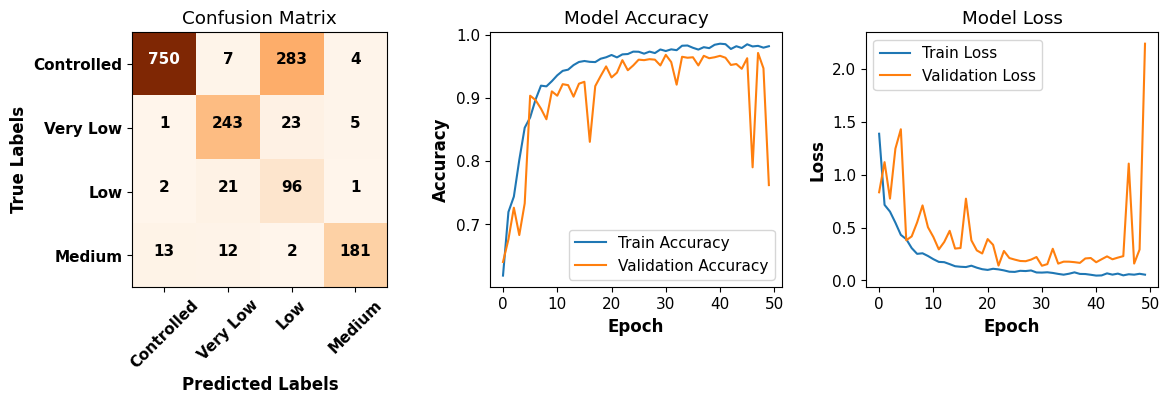

In [ ]:
evaluate_model_nn(X_train, y_train, X_val, y_val, X_test, y_test, "", model, history)